In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
# Подгрузим наши данные из соревнования
DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [7]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [9]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [10]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

hotels = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

/tmp/ipykernel_10593/3925405557.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hotels = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [13]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Поскольку адреса отелей известны, можно предположить, что их координаты будут лишним признаком.

In [14]:
hotels = hotels.drop(['lat', 'lng'], axis=1)

Проанализируем адреса ста наиболее посещаемых отелей.

In [15]:
a = hotels['hotel_address'].value_counts()[:20]
a

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom              2958
Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom                  2768
225 Edgware Road Westminster Borough London W2 1JU United Kingdom                 2628
4 18 Harrington Gardens Kensington and Chelsea London SW7 4LH United Kingdom      2565
1 Waterview Drive Greenwich London SE10 0TW United Kingdom                        2551
27 Devonshire Terrace Westminster Borough London W2 3DP United Kingdom            2288
Lakeside Way Brent London HA9 0BU United Ki

In [16]:
b = hotels['hotel_address'].value_counts()[20:40]
b

Empire Way Wembley Brent London HA9 8DS United Kingdom                           1848
Holland Park Avenue Kensington and Chelsea London W11 4UL United Kingdom         1845
Singel 303 309 Amsterdam City Center 1012 WJ Amsterdam Netherlands               1837
St Katherines Way Tower Hamlets London E1W 1LD United Kingdom                    1828
Great Cumberland Place Westminster Borough London W1H 7DL United Kingdom         1809
Delflandlaan 15 Slotervaart 1062 EA Amsterdam Netherlands                        1809
1 3 Queens Garden Westminster Borough London W2 3BA United Kingdom               1770
Staalmeesterslaan 410 Slotervaart 1057 PH Amsterdam Netherlands                  1704
Molenwerf 1 1014 AG Amsterdam Netherlands                                        1686
40 trinity square City of London London EC3N 4DJ United Kingdom                  1683
8 Northumberland Avenue Westminster Borough London WC2N 5BY United Kingdom       1678
24 Ludgate Hill City of London London EC4M 7DR United 

In [17]:
c = hotels['hotel_address'].value_counts()[40:60]
c

20 Lavington Street Southwark London SE1 0NZ United Kingdom                            1517
97 Cromwell Road Kensington and Chelsea London SW7 4DN United Kingdom                  1502
22 Hertsmere Road Tower Hamlets London E14 4ED United Kingdom                          1481
Excel 2 Festoon Way Royal Victoria Dock Newham London E16 1RH United Kingdom           1464
21 rue de Dunkerque 10th arr 75010 Paris France                                        1459
239 Vauxhall Bridge Road Westminster Borough London SW1V 1EQ United Kingdom            1443
1 8 Russell Square Camden London WC1B 5BE United Kingdom                               1425
Hendrikje Stoffelstraat 1 Slotervaart 1058 GC Amsterdam Netherlands                    1364
130 Tottenham Court Road Camden London W1T 5AY United Kingdom                          1354
Piazza Duca D Aosta 4 6 Central Station 20124 Milan Italy                              1335
52 Chiswell Street City of London London EC1Y 4SD United Kingdom                

In [18]:
d = hotels['hotel_address'].value_counts()[60:80]
d

Dam 9 Amsterdam City Center 1012 JS Amsterdam Netherlands                       1243
Leidsekade 97 Amsterdam City Center 1017 PN Amsterdam Netherlands               1242
100 110 Euston Road Camden London NW1 2AJ United Kingdom                        1242
Coram Street Camden London WC1N 1HT United Kingdom                              1216
Cardington Street Euston Camden London NW1 2LP United Kingdom                   1214
43 51 Wembley Hill Road Brent London HA9 8AU United Kingdom                     1212
Prinses Irenestraat 30 Zuideramstel 1077 WX Amsterdam Netherlands               1178
Rusland 17 Amsterdam City Center 1012 CK Amsterdam Netherlands                  1177
146 Praed Street Westminster Borough London W2 1EE United Kingdom               1167
De Passage 90 Noord Holland Zuidoost 1101 AX Amsterdam Netherlands              1157
10 Godliman Street City of London London EC4V 5AJ United Kingdom                1154
5 Fairmont Avenue Canary Wharf Tower Hamlets London E14 9JB Unite

In [19]:
e = hotels['hotel_address'].value_counts()[80:100]
e

Lancaster Gate Westminster Borough London W2 3LG United Kingdom                  1114
31 St Thomas Street Southwark London SE1 9QU United Kingdom                      1113
Vijzelstraat 4 Amsterdam City Center 1017 HK Amsterdam Netherlands               1110
23 Leinster Gardens Westminster Borough London W2 3AN United Kingdom             1107
31 34 Queen s Gate Kensington and Chelsea London SW7 5JA United Kingdom          1103
7 Gracechurch Street City of London London EC3V 0DR United Kingdom               1103
78 84 Sussex Gardens Westminster Borough London W2 1UH United Kingdom            1095
Moll de Barcelona WTC Ciutat Vella 08039 Barcelona Spain                         1082
152 Cricklewood Broadway Cricklewood London NW2 3ED United Kingdom               1079
Arlandaweg 10 Westpoort 1043 EW Amsterdam Netherlands                            1071
2 Bridge Place Victoria Westminster Borough London SW1V 1QA United Kingdom       1063
Avenida Meridiana 151 Sant Mart 08026 Barcelona Spain 

Создадим список пяти стран, где находятся самые посещаемые отели. Создадим колонку стран отелей, куда вернем название страны отеля. Если страны нет в созданном списке поставим отметку 'other'.

In [20]:
country_list = ['United Kingdom', 'Netherlands', 'Italy', 'France', 'Spain']
# функция для создания признака страны
def country_col(x):
    for country in country_list:
        if country in x:
            return country
    return 'other'

In [21]:
hotels['country_col'] = hotels['hotel_address'].apply(country_col)

Для столбца "страна рецензента" обрежем ненужные пробелы по краям значений и оценим насколько многообразно гражданство авторов отзывов.

In [22]:
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: x.strip())
hotels['reviewer_nationality'].unique()

array(['United Kingdom', 'Belgium', 'Sweden', 'United States of America',
       'Ecuador', 'Netherlands', 'Ireland', 'Canada', 'Norway',
       'Bulgaria', 'Italy', 'Australia', 'Seychelles', 'Kuwait',
       'Saudi Arabia', 'Czech Republic', 'France', 'Germany',
       'South Africa', 'United Arab Emirates', 'Greece', 'Spain',
       'Switzerland', 'Macedonia', 'Poland', 'Bahrain', 'Qatar', 'India',
       'Singapore', 'Malaysia', 'Thailand', 'Brazil', 'Crimea', 'Turkey',
       'Israel', '', 'Lebanon', 'Romania', 'Cyprus', 'Portugal',
       'Slovakia', 'Jersey', 'Gibraltar', 'Austria', 'Kenya',
       'Isle of Man', 'Costa Rica', 'Oman', 'Hungary', 'Iceland',
       'Estonia', 'Hong Kong', 'China', 'Malta', 'Pakistan', 'Montenegro',
       'Slovenia', 'South Korea', 'Ukraine', 'Japan', 'Azerbaijan',
       'Russia', 'Brunei', 'Cayman Islands', 'Serbia', 'Argentina',
       'Denmark', 'Egypt', 'Finland', 'Mexico', 'Taiwan', 'Peru',
       'Philippines', 'New Zealand', 'Luxembourg', 

Оставим в столбце "страна рецинзента" только 20 наиболее встречаемых государств, остальные пометим как 'other'.

In [23]:
# создаем словарь "20 самых часто встречающихся стран рецензентов"
rev_nat = dict(hotels['reviewer_nationality'].value_counts()[:20])
# создаем список стран
rev_nat = list(rev_nat.keys())
# функция для замены редко встречающихся стран на 'other'
def rev_nat_col(x):
    if x in rev_nat:
        return x 
    return 'other'
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(rev_nat_col)

Преобразуем категориальные признаки в пригодные для обучения.

In [24]:
# импорт библиотеки для кодирования
import category_encoders as ce

In [25]:
# однократное кодирование созданного признака страны
encoder = ce.OneHotEncoder(cols=['country_col'])
type_bin = encoder.fit_transform(hotels['country_col'])
hotels = pd.concat([hotels, type_bin], axis=1)

In [26]:
# названий отелей очень много, выберем бинарное кодирование
bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
type_bin = bin_encoder.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, type_bin], axis=1)

# в признаке "страна рецинзента" мы оставили более 20 разных значений, выберем бинарное кодирование
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) 
type_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis=1)

Оставим в признаке "количество дней между датой проверки и датой очистки" только число.

In [27]:
# функция для возврата числа из строки
def return_num(x):
    for s in str.split(x):
        if s.isdigit():
            return int(s)

# применяем функцию к столбцу
hotels['days_since_review'] = hotels['days_since_review'].apply(return_num)

Заменим строковый признак "дата размещения отзыва", на числовой "количество дней от первого отзыва".

In [28]:
# преобразуем искомый признак в формат datetime
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

# найдем дату первого отзыва
min_date = hotels['review_date'].min()

# создадим новый признак
hotels['hm_days'] = (hotels['review_date'] - pd.to_datetime(min_date)).dt.days

# избавимся от искомого признака
hotels = hotels.drop(['review_date'], axis=1)

In [29]:
hotels.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
average_score                                     34
hotel_name                                      1492
reviewer_nationality                              21
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
sample                                             2
reviewer_score                                    38
country_col                                        6
country_col_1                                      2
country_col_2                                      2
country_col_3                                 

<AxesSubplot:>

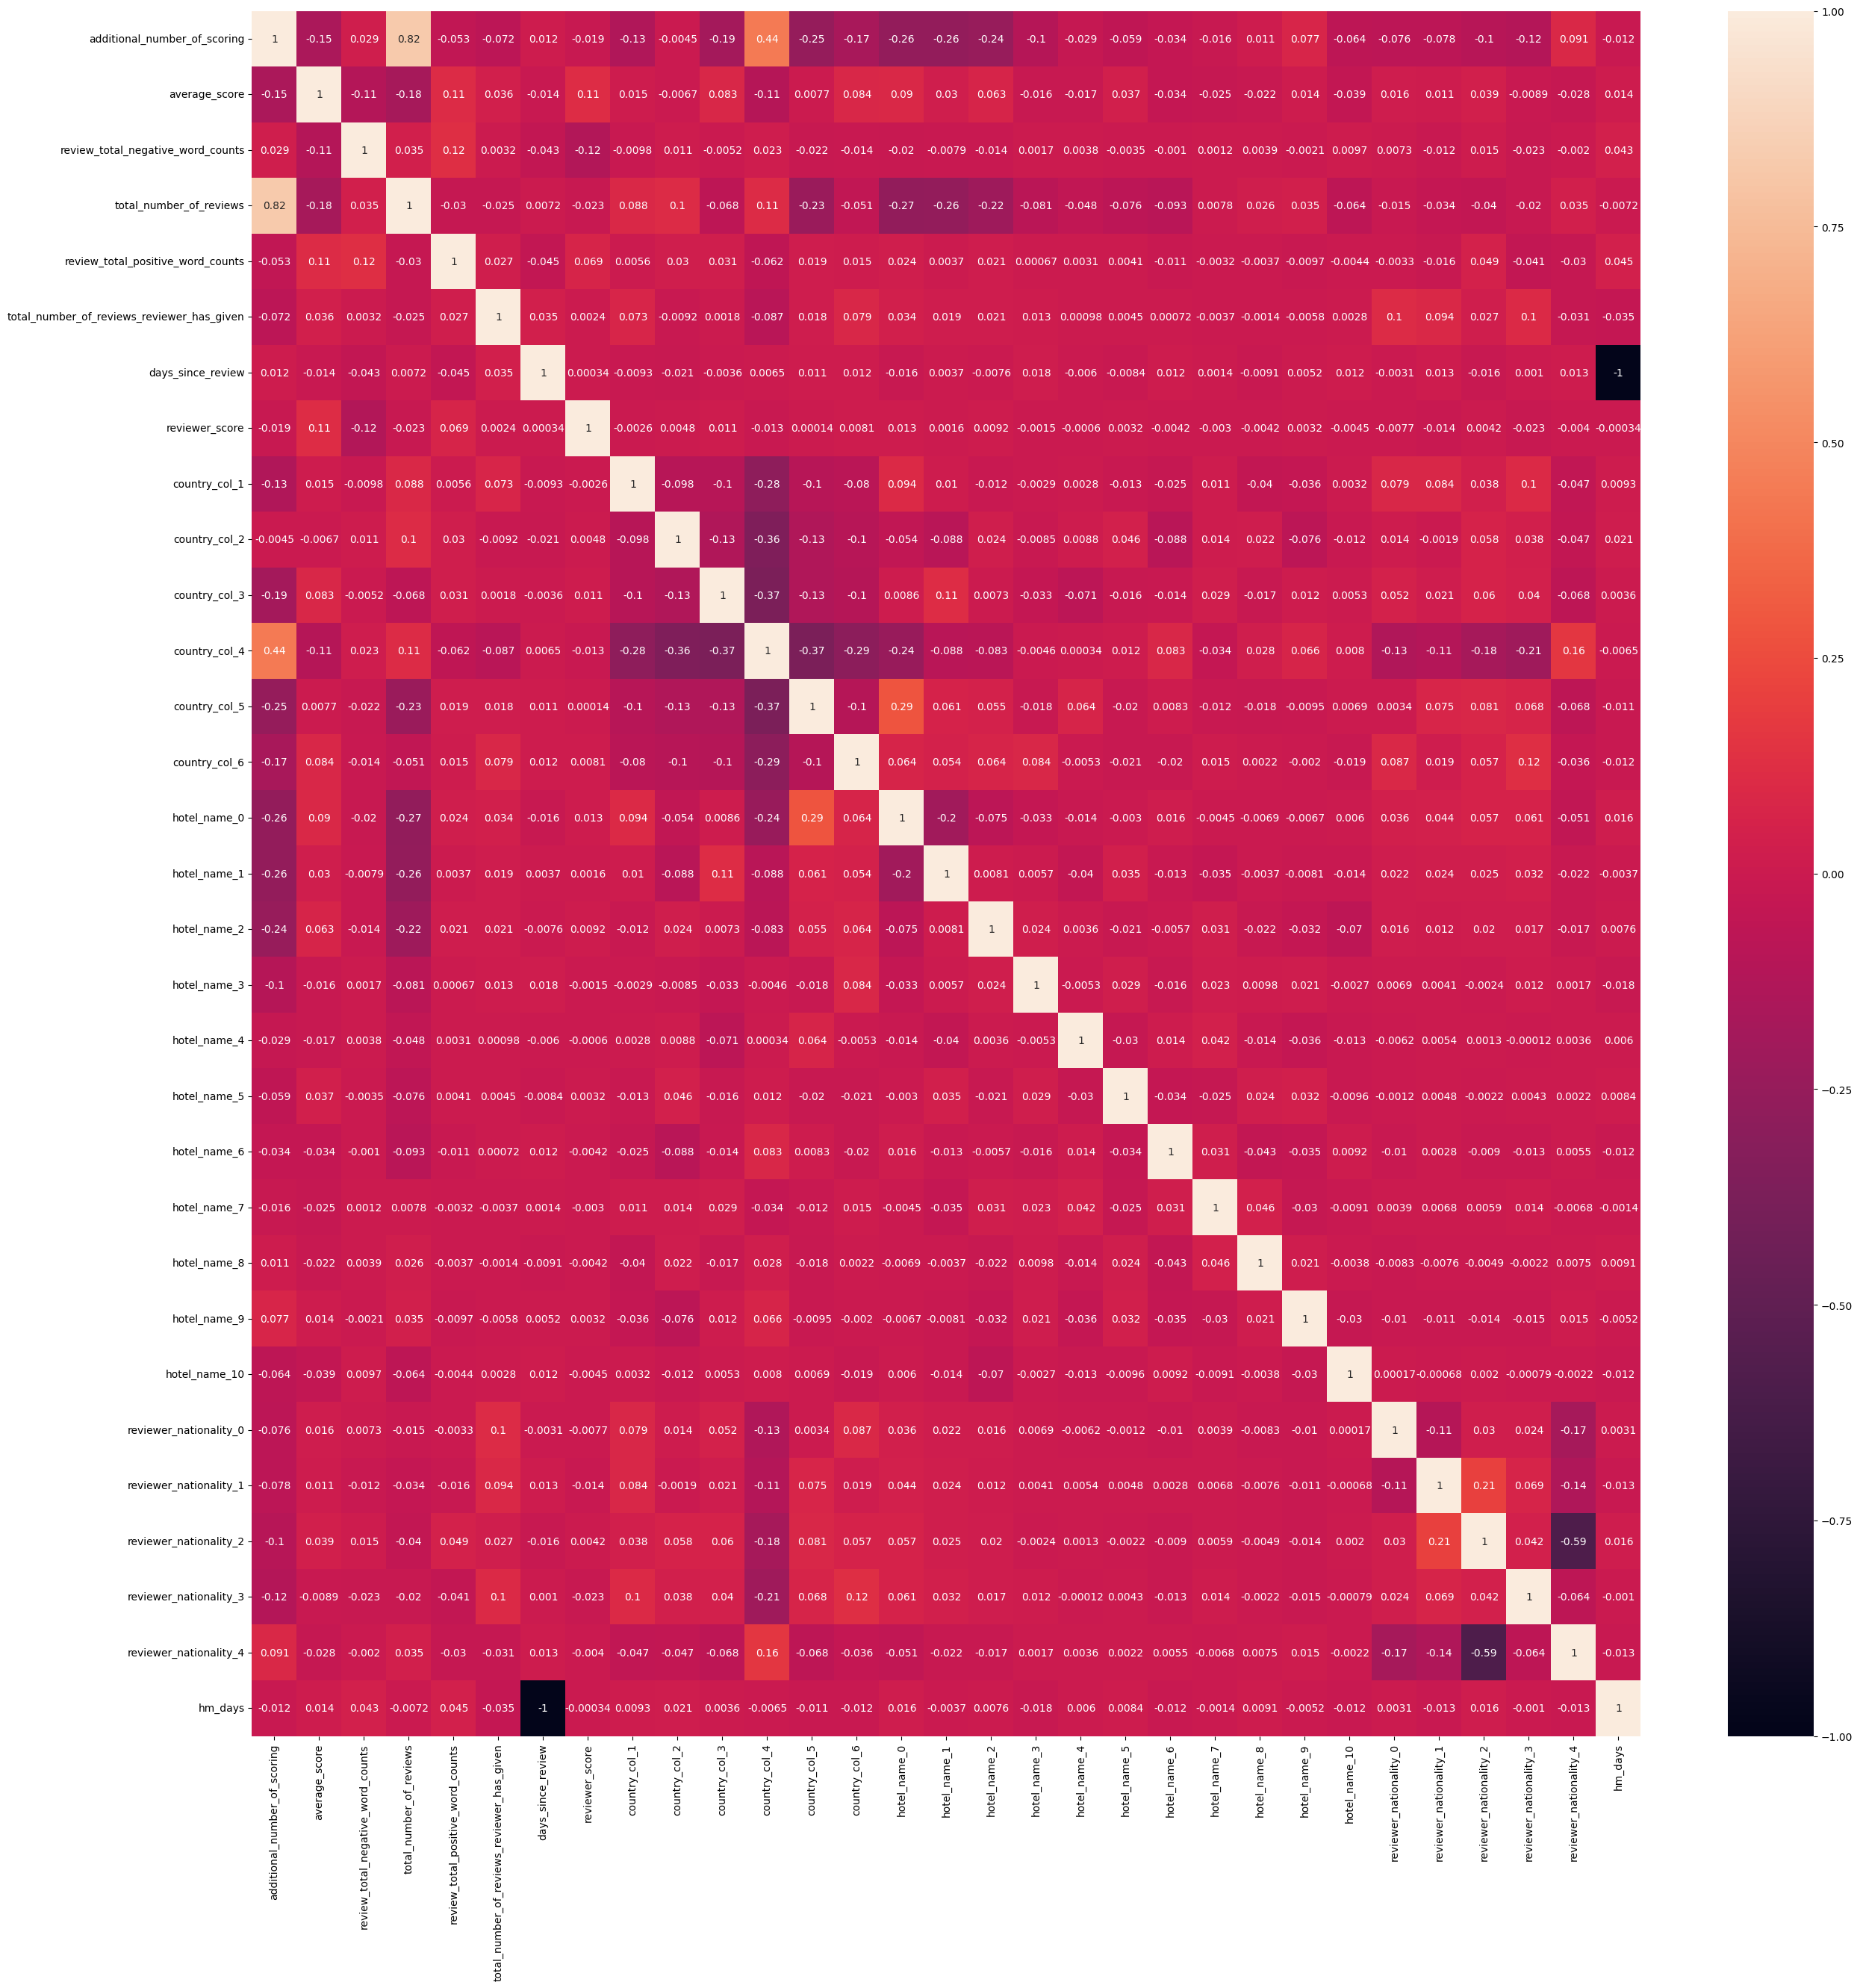

In [30]:
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(hotels.drop(['sample'], axis=1).corr(), annot=True)

Две пары признаков обладают абсолютной ('hm_days' - 'days_since_review') и сильной ('total_number_of_reviews' - 'additional_number_of_scoring') корреляцией. Удалим по одному признаку из этих пар.

In [31]:
hotels = hotels.drop(['hm_days', 'total_number_of_reviews'], axis=1)

Выделим исходя из тегов отдельный признак "количество проведенных ночей".

In [32]:
# создаем регулярное выражение
regex = 'Stayed\s\d+'
# создаем новый признак указывающий на количество проведенных ночей
hotels['nights'] = hotels['tags'].str.findall(regex).str.get(0)
# при отсутствии тега о проведенных ночах указываем нулевое значение
hotels['nights'] = hotels['nights'].fillna(0)
# применяем ранее созданную функцию
hotels['nights'] = hotels['nights'].apply(lambda x: 0 if x==0 else return_num(x))

Прменим библиотеку nltk для распознавания тональности текста отзывов

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

hotels['posit_rev'] = hotels['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x))
hotels['negat_rev'] = hotels['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x))
hotels

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/denis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,hotel_name_9,hotel_name_10,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,nights,posit_rev,negat_rev
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,Hotel was great clean friendly staff free bre...,62,1,...,0,1,0,0,0,0,1,2,"{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...","{'neg': 0.129, 'neu': 0.747, 'pos': 0.125, 'co..."
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,No Positive,0,7,...,1,0,0,0,0,1,0,1,"{'neg': 0.379, 'neu': 0.0, 'pos': 0.621, 'comp...","{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp..."
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,other,Pillows,3,Nice welcoming and service,5,15,...,1,1,0,0,0,1,1,1,"{'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compou...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Piazza Della Repubblica 17 Central Station 201...,241,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,Everything including the nice upgrade The Hot...,27,9,...,0,0,0,0,1,0,0,1,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,9.1,Hotel Esther a,United Kingdom,No Negative,0,Lovely hotel v welcoming staff,7,2,...,0,1,0,0,0,0,1,2,"{'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compou...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,9 Knaresborough Place Kensington and Chelsea L...,107,9.0,Hotel Moonlight,France,No Negative,0,Tr s proche du metro Earl s court,10,10,...,0,1,0,1,1,0,0,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
515734,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,The bed was so comfy I stayed with my boyfrie...,93,1,...,0,1,1,0,0,1,0,4,"{'neg': 0.045, 'neu': 0.857, 'pos': 0.098, 'co...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
515735,29 31 Gower Street Camden London WC1E 6HG Unit...,457,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,great location simple check in out nice shower,9,21,...,0,0,0,0,1,0,1,1,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
515736,31 Great Cumberland Place Westminster Borough ...,365,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,Location and very comfy bed,6,28,...,0,1,0,1,1,1,1,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [34]:
# создание новых признаков на основе негативных отзывов
hotels['negative_review_neg'] = hotels['negat_rev'].apply(lambda x: x['neg'])
hotels['negative_review_neu'] = hotels['negat_rev'].apply(lambda x: x['neu'])
hotels['negative_review_pos'] = hotels['negat_rev'].apply(lambda x: x['pos'])
hotels['negative_review_compound'] = hotels['negat_rev'].apply(lambda x: x['compound'])

# создание новых признаков на основе позитивных отзывов
hotels['positive_review_neg'] = hotels['posit_rev'].apply(lambda x: x['neg'])
hotels['positive_review_neu'] = hotels['posit_rev'].apply(lambda x: x['neu'])
hotels['positive_review_pos'] = hotels['posit_rev'].apply(lambda x: x['pos'])
hotels['positive_review_compound'] = hotels['posit_rev'].apply(lambda x: x['compound'])

In [35]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

In [36]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   review_total_positive_word_counts           515738 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 5   days_since_review                           515738 non-null  int64  
 6   sample                                      515738 non-null  int64  
 7   reviewer_score                              515738 non-null  float64
 8   country_col_1                               515738 non-null  int64  
 9   country_col_2                               515738 non-null  int64  
 

In [37]:
# Теперь выделим тестовую часть
train_data = hotels.query('sample == 1').drop(['sample'], axis=1)
test_data = hotels.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [38]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [39]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 38), (386803, 38), (386803, 37), (309442, 37), (77361, 37))

In [41]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [42]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [43]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


In [44]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8803241476109838


<AxesSubplot:>

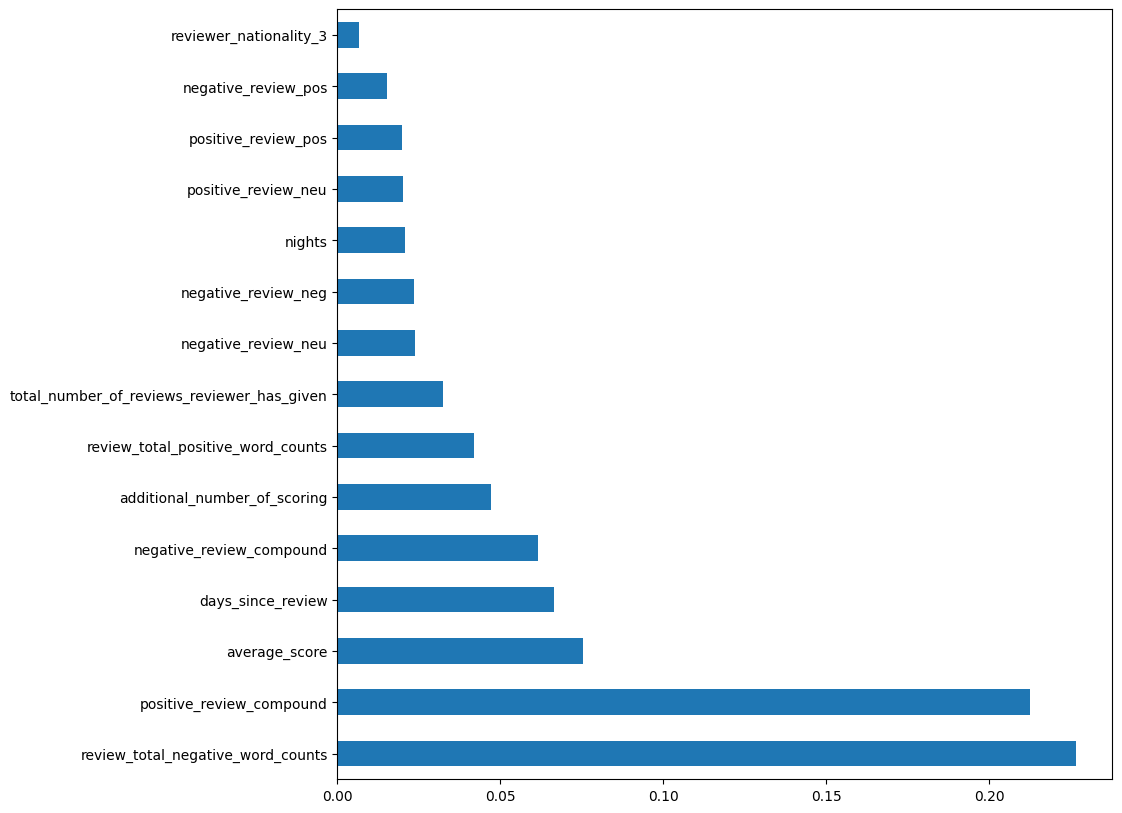

In [45]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [46]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,reviewer_score,country_col_1,country_col_2,country_col_3,...,reviewer_nationality_4,nights,negative_review_neg,negative_review_neu,negative_review_pos,negative_review_compound,positive_review_neg,positive_review_neu,positive_review_pos,positive_review_compound
31919,201,7.5,0,2,20,313,0.0,0,0,0,...,0,1,1.000,0.000,0.000,-0.7096,0.000,1.000,0.000,0.0000
64614,141,8.3,21,22,32,392,0.0,1,0,0,...,1,1,0.072,0.928,0.000,-0.1027,0.000,0.741,0.259,0.7420
93000,315,9.4,25,46,6,502,0.0,0,0,0,...,1,2,0.163,0.837,0.000,-0.4767,0.000,0.629,0.371,0.9714
99494,2288,8.1,27,12,7,129,0.0,0,0,0,...,1,1,0.100,0.615,0.285,0.5719,0.000,0.804,0.196,0.2382
354,332,8.7,7,14,4,525,0.0,0,0,0,...,1,2,0.000,1.000,0.000,0.0000,0.000,0.463,0.537,0.8505
52480,33,8.5,0,59,5,370,0.0,0,0,1,...,1,3,1.000,0.000,0.000,-0.7096,0.000,0.639,0.361,0.9733
79491,36,8.4,3,0,7,720,0.0,0,0,0,...,1,1,0.000,1.000,0.000,0.0000,0.379,0.000,0.621,0.3400
88827,601,8.5,51,16,3,150,0.0,0,1,0,...,1,2,0.083,0.869,0.048,-0.2006,0.000,0.506,0.494,0.8945
48323,117,8.4,3,3,39,82,0.0,0,0,0,...,1,4,0.688,0.312,0.000,-0.2960,0.000,1.000,0.000,0.0000
69244,617,8.8,4,11,3,464,0.0,0,0,0,...,1,3,0.000,1.000,0.000,0.0000,0.000,0.277,0.723,0.9195


In [47]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [48]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [49]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


In [50]:
predict_submission

array([8.737, 7.066, 8.551, ..., 8.036, 9.496, 7.517])

In [51]:
list(sample_submission)

['reviewer_score', 'id']

In [52]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission_out.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.737,488440
1,7.066,274649
2,8.551,374688
3,9.719,404352
4,9.616,451596
5,9.156,302161
6,7.855,317079
7,7.698,13963
8,8.435,159785
9,7.058,195089
